# 1. Camera Calibration

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

In [3]:
# Get the calibration images #
images = glob.glob('camera_cal/calibration*.jpg')

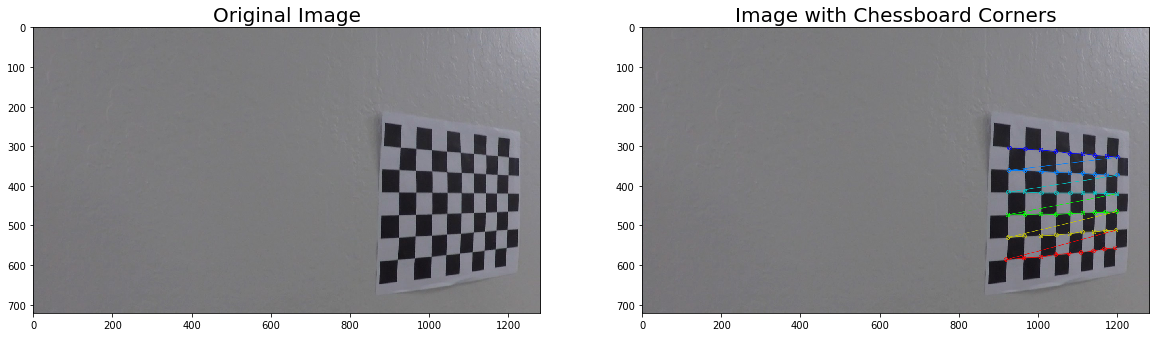

In [4]:
# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0) #
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images #
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Step through the list and search for chessboard corners #
for idx, fname in enumerate(images):
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    if(idx == 1):
            f, axes= plt.subplots(1,2,figsize=(20,10))
            # Plotting the original Image
            axes[0].set_title('Original Image', fontsize=20)
            axes[0].imshow(img)
            
    # Find the Chessboard Corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    
    # If found, add object points, image points #
    if(ret==True):
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # Draw Chessboard Corners #
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        
        if(idx == 1):
            axes[1].set_title('Image with Chessboard Corners', fontsize=20)
            axes[1].imshow(img)
            

# 2. Calculate Undistortion Parameters

Text(0.5,1,'Undistorted Image')

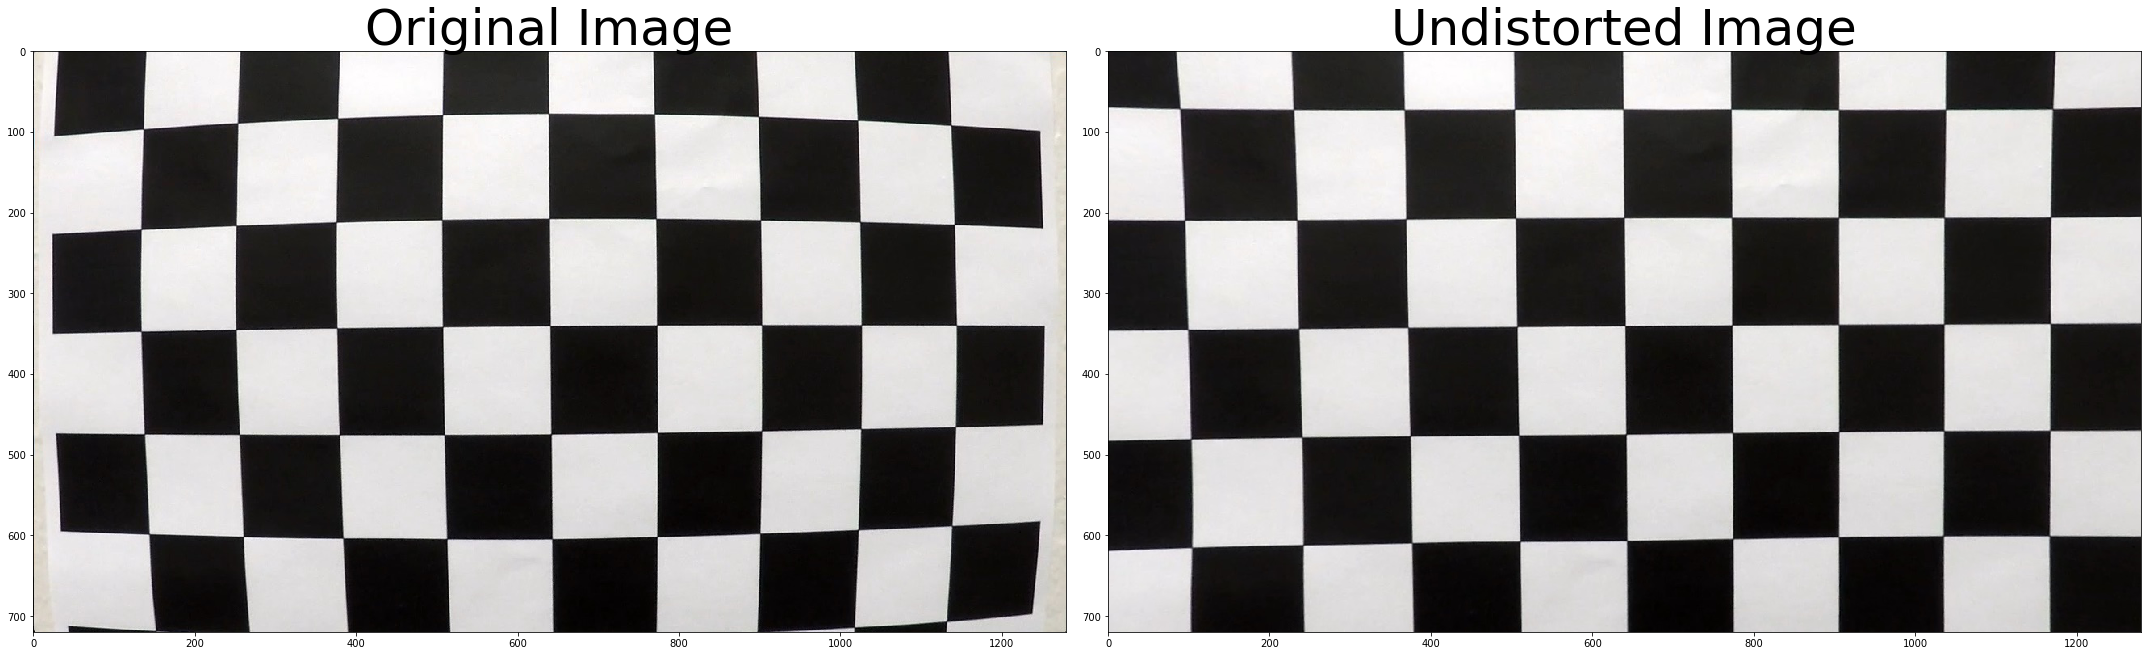

In [5]:
img = mpimg.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Calculate Undistortion Coefficients #
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

# Use the above Undistortion Cofficients to Undistort an image #
undist = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,30))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=50)


# 3. Undistort Images

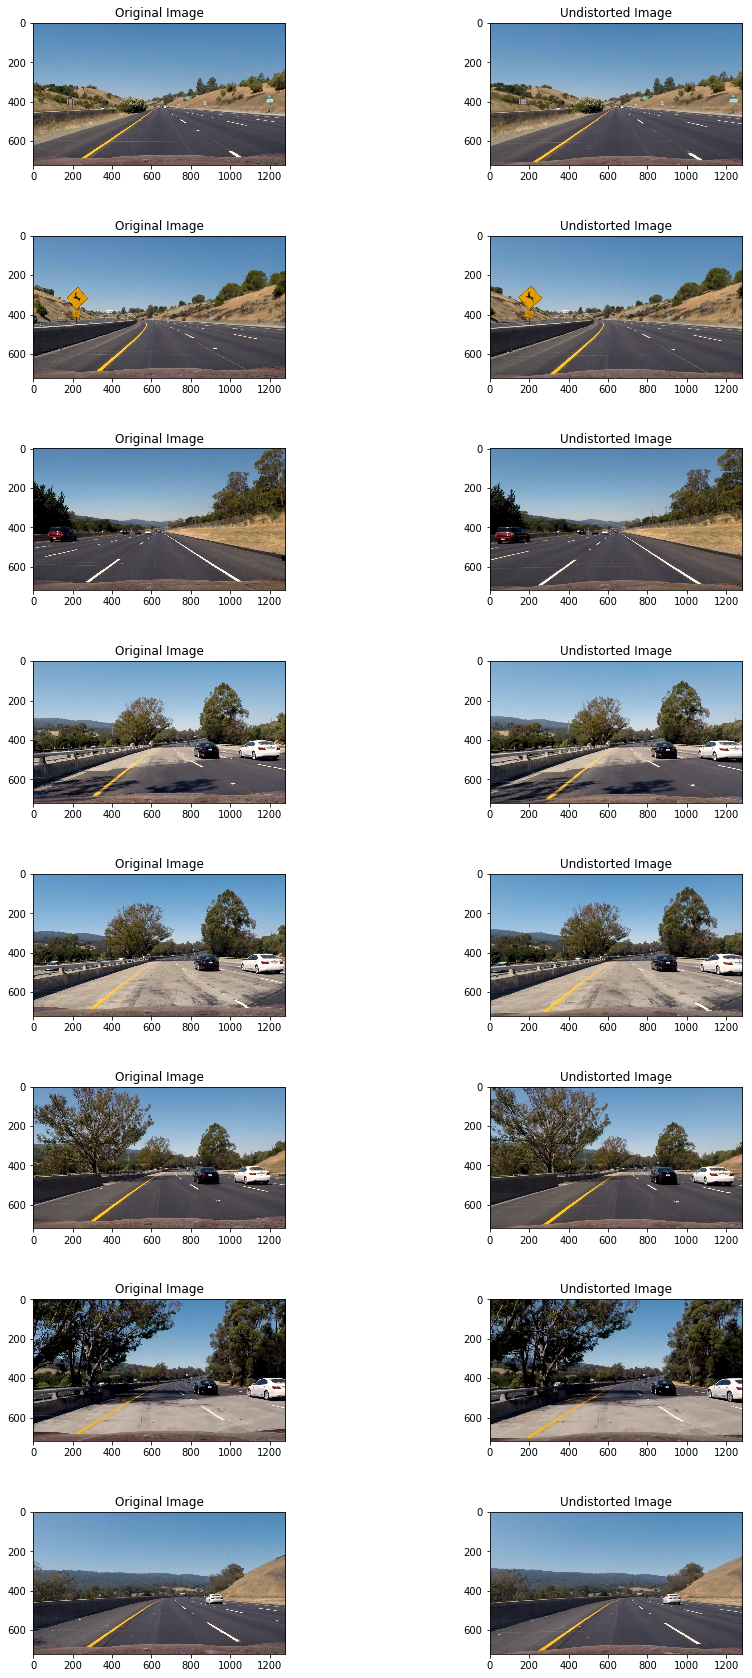

In [6]:
def undistortImage(image):
    return cv2.undistort(image, mtx, dist, None, mtx)

# Get Images from test_images folder #
images = glob.glob('test_images/*.jpg')

f, axes = plt.subplots(8,2,figsize=(15,30))
f.subplots_adjust(hspace=0.5)

#original_untouched_images=[]
for index, image in enumerate(images):
    #originalImage= cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
    originalImage = mpimg.imread(image)
    #original_untouched_images.append(originalImage)
    axes[index,0].imshow(originalImage)
    axes[index,0].set_title("Original Image")
    # undistorting image #
    undistortedImg = undistortImage(originalImage) 
    axes[index,1].set_title("Undistorted Image")
    axes[index,1].imshow(undistortedImg)

# 4. Region of Interest and Warping

In [7]:
# Defining a Region of Interest #
left = [150,720]       # left bottom most point of trapezium
right = [1250,720]     # right bottom most point of trapezium
apex_left = [590,450]  # left top most point of trapezium
apex_right = [700,450] # right top most point of trapezium

def ROI(originalImage):
    return cv2.polylines(originalImage,np.int32(np.array([[left,apex_left,apex_right,right]])),True,(0,0,255),10)

# Warping an Image from bird's eye view #
src = np.float32([left,apex_left,apex_right,right])              # Source Points for Image Warp #
dst = np.float32([[200 ,720], [200  ,0], [980 ,0], [980 ,720]])  # Destination Points for Image Warp #

def WarpPerspective(image):
    y=image.shape[0]
    x=image.shape[1]
    M = cv2.getPerspectiveTransform(src, dst)
    return cv2.warpPerspective(image, M, (x,y), flags=cv2.INTER_LINEAR)

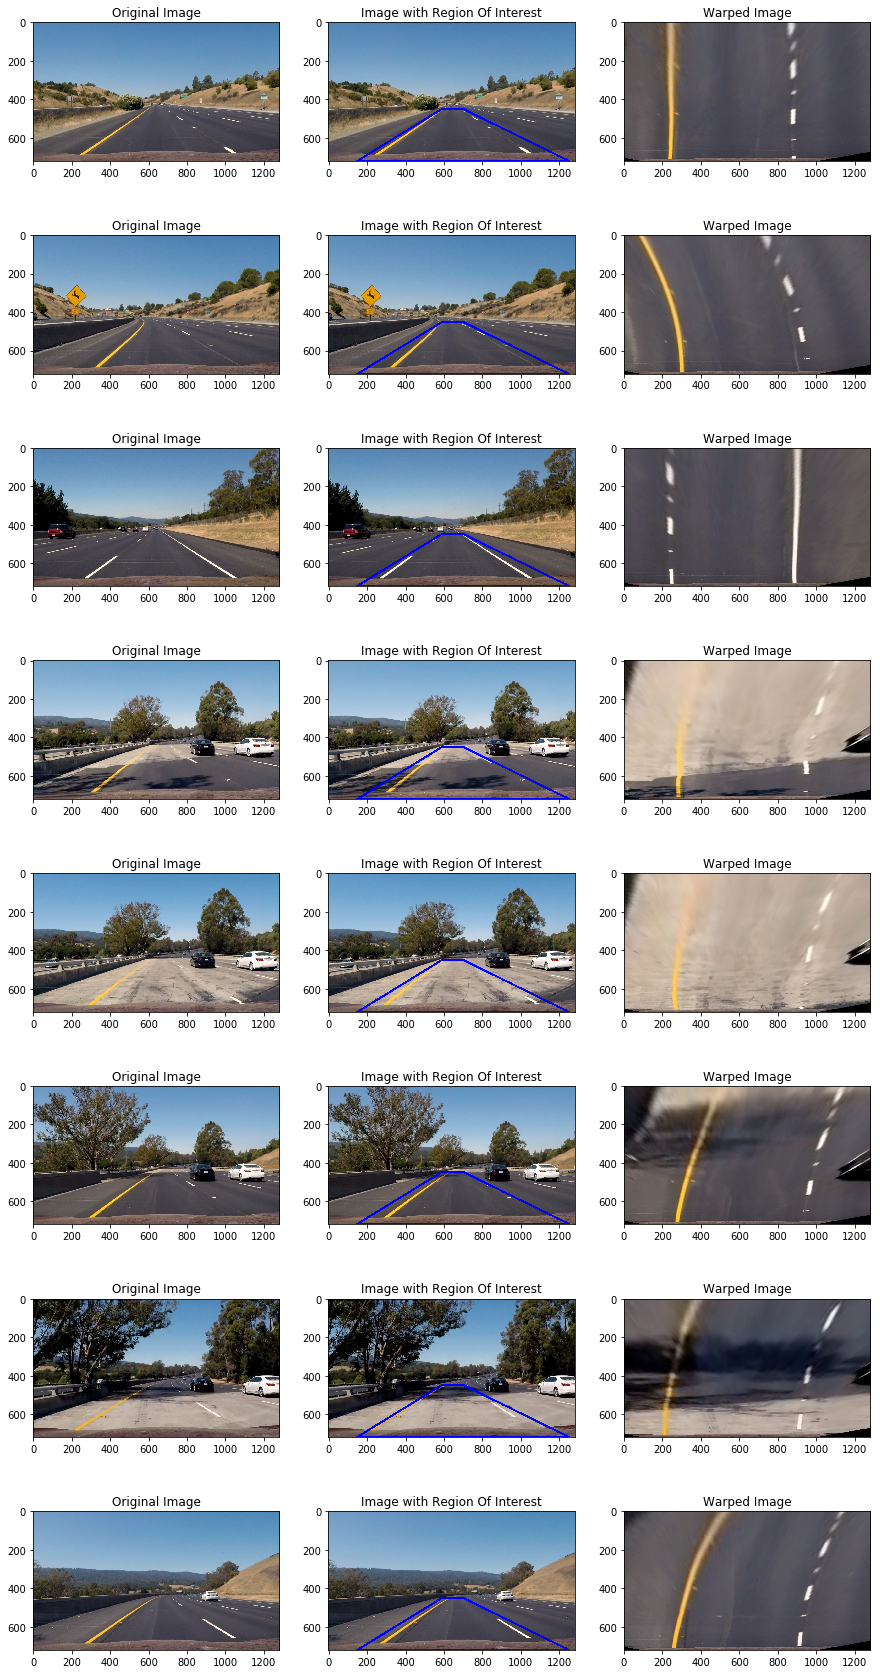

In [8]:
# Show ROI and Wrap on Test Images #
f, axes= plt.subplots(8,3,figsize=(15,30))
f.subplots_adjust(hspace=0.5)

warpedImages=[]
for index, image in enumerate(images):
    #originalImage= cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
    originalImage = mpimg.imread(image)
    untouchedImage = originalImage.copy()
    axes[index,0].imshow(originalImage)
    axes[index,0].set_title("Original Image")
    ROI(originalImage)
    axes[index,1].imshow(originalImage)
    axes[index,1].set_title("Image with Region Of Interest")
    y = untouchedImage.shape[0]
    x = untouchedImage.shape[1]
    warped = WarpPerspective(untouchedImage)
    warpedImages.append(warped)
    axes[index,2].imshow(warped)
    axes[index,2].set_title("Warped Image")

# 5. Exploring different Color Spaces

In [9]:
# Selecting a Color Space #
def ExtractChannel(image,colorspace,threshold,channel=0):
    colorspace = cv2.cvtColor(image, colorspace)
    extracted_channel = colorspace[:,:,channel]
    binary = np.zeros_like(extracted_channel)
    binary[(extracted_channel >= threshold[0]) & (extracted_channel <= threshold[1])] = 1
    return binary

Text(0.5,1,'B')

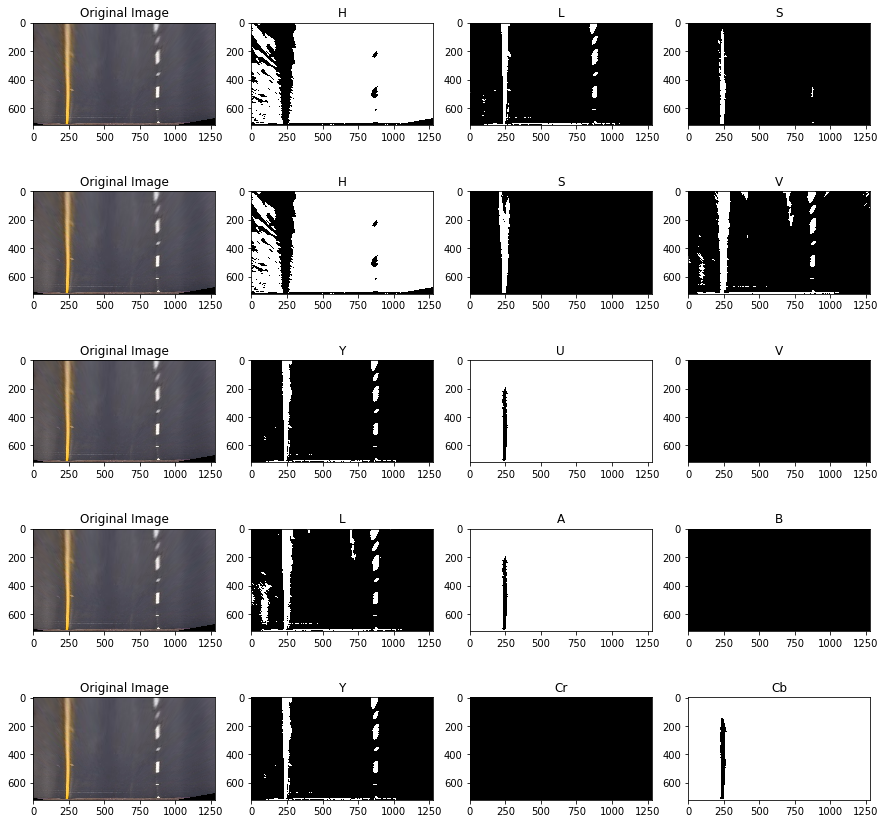

In [10]:
# Show Color Spaces on Test Images
f, axes= plt.subplots(5,4,figsize=(15,15))

image = warpedImages[0]
threshold = [100,255]
index=0

# HLS Colorspace
axes[index,0].imshow(image)
axes[index,0].set_title("Original Image")

h=ExtractChannel(image, cv2.COLOR_RGB2HLS ,threshold,0)
axes[index,1].imshow(h,cmap='gray')
axes[index,1].set_title("H")

l=ExtractChannel(image, cv2.COLOR_RGB2HLS ,threshold,1)
axes[index,2].imshow(l,cmap='gray')
axes[index,2].set_title("L")

s=ExtractChannel(image, cv2.COLOR_RGB2HLS ,threshold,2)
axes[index,3].imshow(s,cmap='gray')
axes[index,3].set_title("S")

# HSV Colorspace
axes[index+1,0].imshow(image)
axes[index+1,0].set_title("Original Image")

h=ExtractChannel(image, cv2.COLOR_RGB2HSV ,threshold,0)
axes[index+1,1].imshow(h,cmap='gray')
axes[index+1,1].set_title("H")

s=ExtractChannel(image, cv2.COLOR_RGB2HSV ,threshold,1)
axes[index+1,2].imshow(s,cmap='gray')
axes[index+1,2].set_title("S")

v=ExtractChannel(image, cv2.COLOR_RGB2HSV ,threshold,2)
axes[index+1,3].imshow(v,cmap='gray')
axes[index+1,3].set_title("V")

# YUV Colorspace
axes[index+2,0].imshow(image)
axes[index+2,0].set_title("Original Image")

y=ExtractChannel(image, cv2.COLOR_RGB2YUV ,threshold,0)
axes[index+2,1].imshow(y,cmap='gray')
axes[index+2,1].set_title("Y")

u=ExtractChannel(image, cv2.COLOR_RGB2YUV ,threshold,1)
axes[index+2,2].imshow(u,cmap='gray')
axes[index+2,2].set_title("U")

v=ExtractChannel(image, cv2.COLOR_RGB2YUV ,threshold,2)
axes[index+2,3].imshow(v,cmap='gray')
axes[index+2,3].set_title("V")

# YCrCb Colorspace
axes[index+3,0].imshow(image)
axes[index+3,0].set_title("Original Image")

y=ExtractChannel(image, cv2.COLOR_RGB2YCrCb ,threshold,0)
axes[index+4,1].imshow(y,cmap='gray')
axes[index+4,1].set_title("Y")

cr=ExtractChannel(image, cv2.COLOR_RGB2YCrCb ,threshold,1)
axes[index+4,2].imshow(cr,cmap='gray')
axes[index+4,2].set_title("Cr")

cb=ExtractChannel(image, cv2.COLOR_RGB2YCrCb ,threshold,2)
axes[index+4,3].imshow(cb,cmap='gray')
axes[index+4,3].set_title("Cb")

# LAB Colorspace
axes[index+4,0].imshow(image)
axes[index+4,0].set_title("Original Image")

l=ExtractChannel(image, cv2.COLOR_RGB2LAB ,threshold,0)
axes[index+3,1].imshow(l,cmap='gray')
axes[index+3,1].set_title("L")

a=ExtractChannel(image, cv2.COLOR_RGB2YUV ,threshold,1)
axes[index+3,2].imshow(a,cmap='gray')
axes[index+3,2].set_title("A")

b=ExtractChannel(image, cv2.COLOR_RGB2YUV ,threshold,2)
axes[index+3,3].imshow(b,cmap='gray')
axes[index+3,3].set_title("B")

# 6. Exploring Sobel

In [11]:
# Sobel Function #
def Sobel(image, threshold, sobelType, kernelSize=3):
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # Step 1- Convert to GrayScale
    sobelx = cv2.Sobel(gray,cv2.CV_64F, 1, 0, ksize=kernelSize)
    sobely = cv2.Sobel(gray,cv2.CV_64F, 0, 1, ksize=kernelSize)
    
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    
    grad= np.sqrt(sobelx**2 + sobely**2)
    
    arctan= np.arctan2(abs_sobely,abs_sobelx)
    
    valParam=abs_sobelx
    
    if(sobelType=='x'):
        valParam=abs_sobelx
    elif(sobelType=='y'):
        valParam= abs_sobely
    elif(sobelType=='xy'):
        valParam= grad
    else:
        valParam=arctan
        
    
    img = np.uint8((valParam* 255)/np.max(valParam)) # Creating a normalized sobel image
    binary_output = np.zeros_like(img)
    binary_output[(img > threshold[0]) & (img < threshold[1])]=1
    return binary_output

Text(0.5,1,'Sobel Direction')

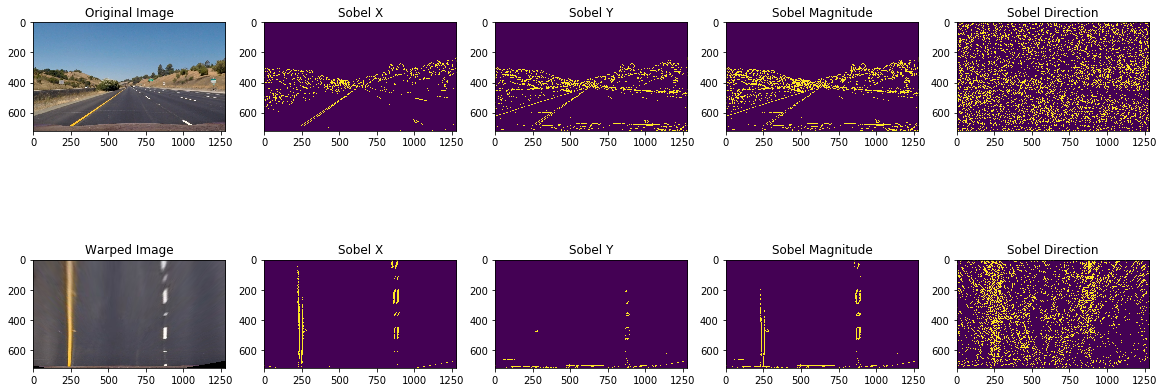

In [12]:
# Apply sobel on test_image and warped image
f, axes= plt.subplots(2,5,figsize=(20,8))

threshold = [20,100]
originalImage = images[0]
originalImage = mpimg.imread(originalImage)

index=0

axes[index,0].imshow(originalImage)
axes[index,0].set_title("Original Image")

sobelx=Sobel(originalImage,threshold,'x')
axes[index,1].imshow(sobelx)
axes[index,1].set_title("Sobel X")

sobely=Sobel(originalImage,threshold,'y')
axes[index,2].imshow(sobely)
axes[index,2].set_title("Sobel Y")

sobelxy=Sobel(originalImage,threshold,'xy')
axes[index,3].imshow(sobelxy)
axes[index,3].set_title("Sobel Magnitude")

sobeldir=Sobel(originalImage,threshold,'dir')
axes[index,4].imshow(sobeldir)
axes[index,4].set_title("Sobel Direction")

index=index+1

axes[index,0].imshow(image)               # image = warpedImages[0]
axes[index,0].set_title("Warped Image")

sobelx=Sobel(image,threshold,'x')
axes[index,1].imshow(sobelx)
axes[index,1].set_title("Sobel X")

sobely=Sobel(image,threshold,'y')
axes[index,2].imshow(sobely)
axes[index,2].set_title("Sobel Y")

sobelxy=Sobel(image,threshold,'xy')
axes[index,3].imshow(sobelxy)
axes[index,3].set_title("Sobel Magnitude")

sobeldir=Sobel(image,threshold,'dir')
axes[index,4].imshow(sobeldir)
axes[index,4].set_title("Sobel Direction")

# 7. Combine Sobel and Color Space

In [13]:
# Combining Best of Color Space and Sobel #
def combineEverything(image, color_threshold, sobel_threshold):
    
    s_channel = ExtractChannel(image,cv2.COLOR_RGB2HLS,color_threshold,2)
    l_channel = ExtractChannel(image,cv2.COLOR_RGB2HLS,color_threshold,1)
    y_channel = ExtractChannel(image,cv2.COLOR_RGB2YUV,color_threshold,0)
    
    sobelx = Sobel(image, sobel_threshold, 'x')
    #sobeldir = Sobel(image, [0.7,25], 'dir')
    
    combined_binary = np.zeros_like(s_channel)
    combined_binary[((s_channel == 1) & (l_channel==1) & (y_channel==1)) | (sobelx == 1)  ] = 1
    return combined_binary

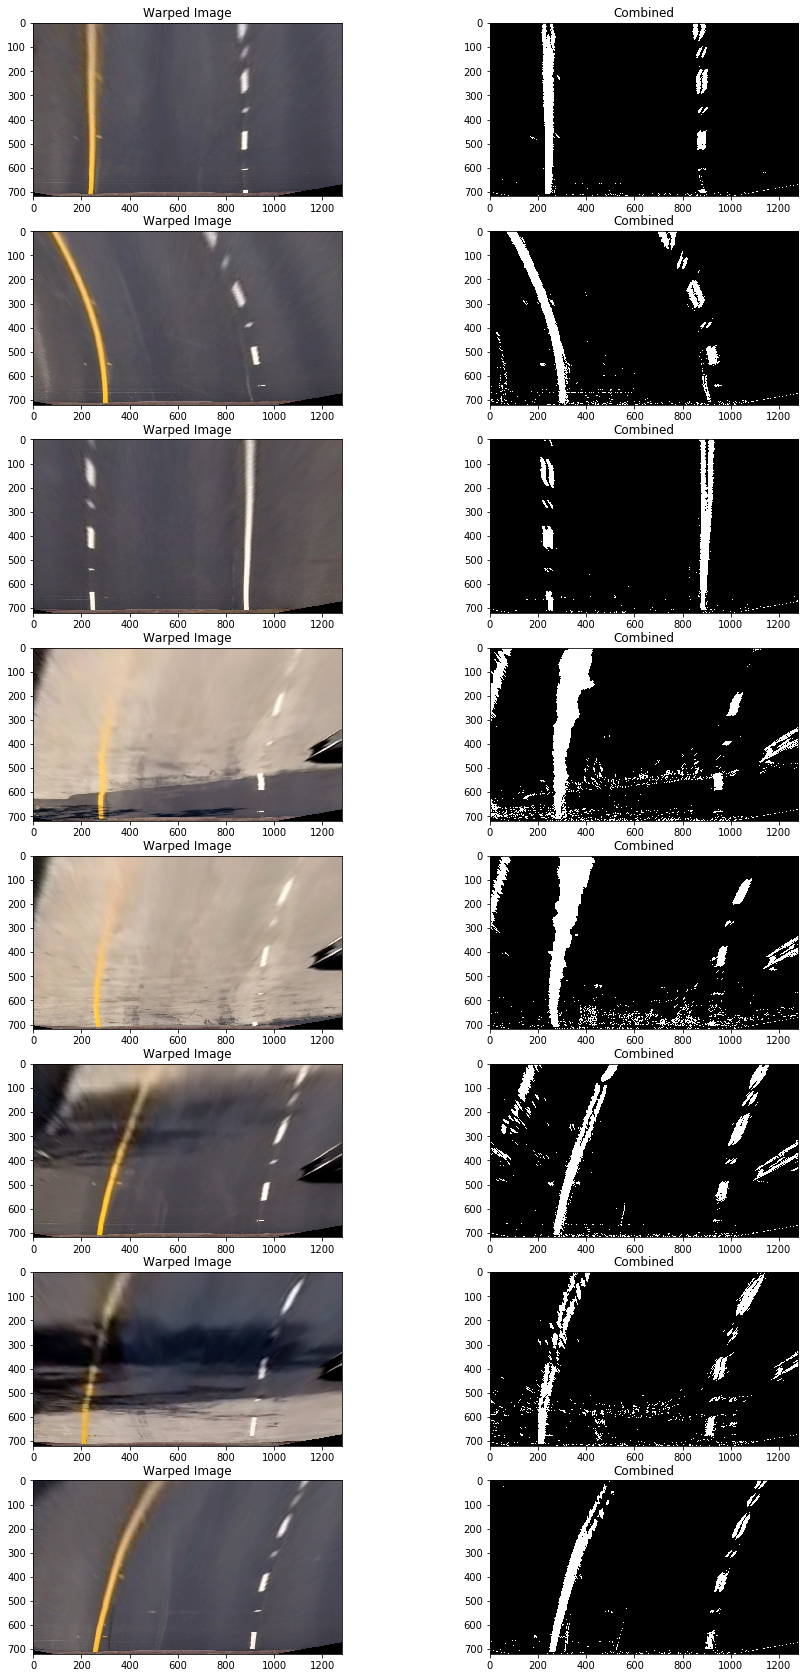

In [14]:
# Apply Combination on Warped Images #
f, axes= plt.subplots(8,2,figsize=(15,30))

for index,warped in enumerate(warpedImages):
    combinedImage=combineEverything(warped,[100,255],[10,150])
    axes[index,0].imshow(warped)
    axes[index,0].set_title("Warped Image")
    axes[index,1].imshow(combinedImage,cmap='gray')
    axes[index,1].set_title("Combined")

# 8. Plotting Histogram

In [15]:
def Histogram(warpedimage):
    return np.sum(warpedimage[warpedimage.shape[0]//2:,:], axis=0)

Text(0.5,1,'Histogram')

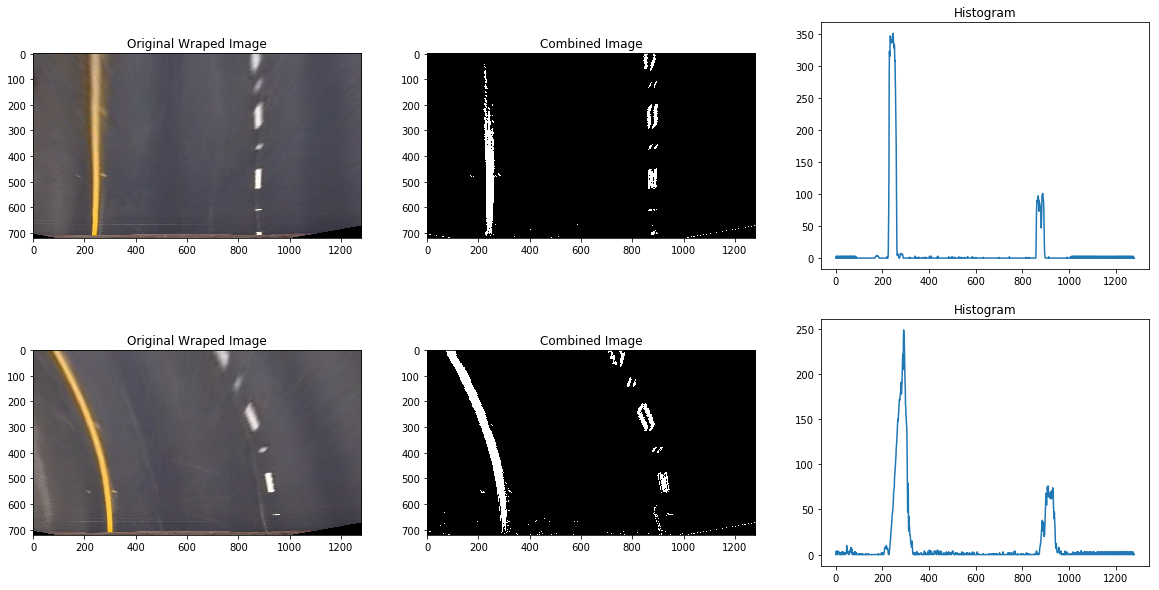

In [16]:
# Apply Histogram on test images
f, axes= plt.subplots(2,3,figsize=(20,10))

index=0

axes[index,0].imshow(image)
axes[index,0].set_title("Original Wraped Image")

combinedImage=combineEverything(image,[150,255],[20,100])
axes[index,1].imshow(combinedImage,cmap="gray")
axes[index,1].set_title("Combined Image")

histogram = Histogram(combinedImage)
axes[index,2].plot(histogram)
axes[index,2].set_title("Histogram")

image2= warpedImages[1]
index=index+1

axes[index,0].imshow(image2)
axes[index,0].set_title("Original Wraped Image")

combinedImage1=combineEverything(image2,[150,255],[20,100])
axes[index,1].imshow(combinedImage1,cmap="gray")
axes[index,1].set_title("Combined Image")

histogram = Histogram(combinedImage1)
axes[index,2].plot(histogram)
axes[index,2].set_title("Histogram")

# 9. Finding Lane Lines with Sliding Window

In [17]:
def SlidingWindowSearch(binary_warped, plot=False):

    histogram = Histogram(binary_warped)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS #
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        if(plot==True):
            cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
            cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    return left_fit,right_fit,left_lane_inds,right_lane_inds,out_img

# 10. Draw Sliding Window for visualisation

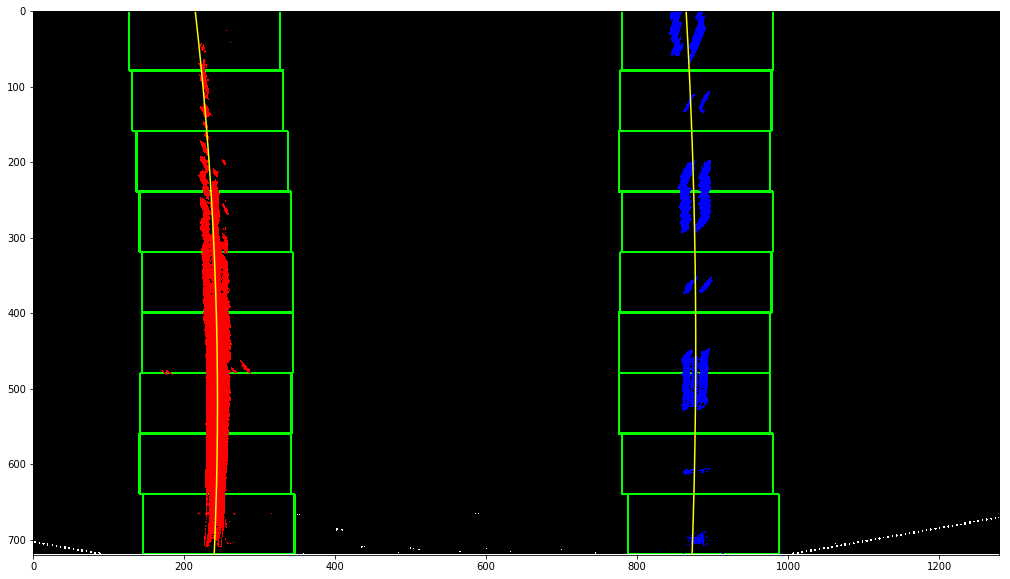

In [18]:
def VisualizeSlidingWindow(binary_warped, left_fit,right_fit, left_lane_inds, right_lane_inds,out_img):
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ## Visualization ##
    # Colors in the left and right lane regions #
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    # Generate x and y values for plotting #
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty +left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    plt.figure(figsize=(20,10))
    plt.imshow(out_img)
    # Plots the left and right polynomials on the lane lines #
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)
    #return out_img

l,r,ld,rd,o=SlidingWindowSearch(combinedImage, plot=True)
VisualizeSlidingWindow(combinedImage,l,r,ld,rd,o)

# 11. Finding Lane Line from prior frame for smooth visualization

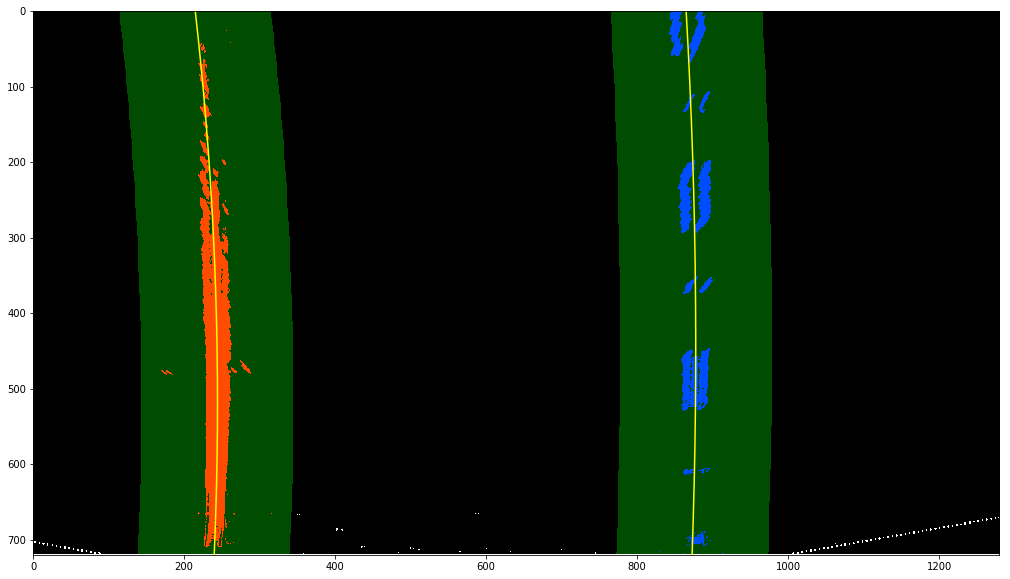

In [19]:
def VisualizeLaneDetection(binary_warped, left_fit,right_fit, left_lane_inds, right_lane_inds,out_img):
    margin = 100
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ## Visualization ##
    # Colors in the left and right lane regions #
    #out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    #out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    # Generate x and y values for plotting #
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty +left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
   
    # Create an image to draw on and an image to show the selection window #
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    
    ## Visualization ##
    # Colors in the left and right lane regions #
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area #
    # And recast the x and y points into usable format for cv2.fillPoly() #
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                                  ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                                  ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    plt.figure(figsize=(20,10))
    plt.imshow(result)
    # Plot the polynomial lines onto the image #
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)

l,r,ld,rd,o=SlidingWindowSearch(combinedImage, plot=False)
VisualizeLaneDetection(combinedImage,l,r,ld,rd,o)

# 12. Unwarp the Warped Image and show plotted Lanes

In [20]:
def DrawLine(original_image,binary_warped, left_fit, right_fit):
    
    h,w = binary_warped.shape
    Minv = cv2.getPerspectiveTransform(dst, src)
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty +left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2] 
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
   
    ploty = np.linspace(0, h-1, num=h)# to cover same y-range as image
    
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    cv2.polylines(color_warp, np.int32([pts_left]), isClosed=False, color=(255,0,255), thickness=15)
    cv2.polylines(color_warp, np.int32([pts_right]), isClosed=False, color=(0,255,255), thickness=15)

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (w, h)) 
    #axes[index+1].imshow(newwarp)
    # Combine the result with the original image
    result = cv2.addWeighted(original_image, 1, newwarp, 0.5, 0)
    return result

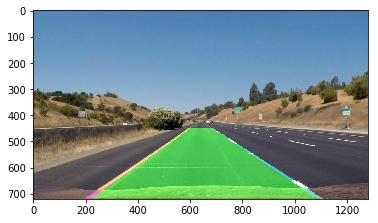

In [21]:
# testing it on test image

originalImage = images[0]
originalImage = mpimg.imread(originalImage)
#originalImage = cv2.cvtColor(cv2.imread(originalImage), cv2.COLOR_BGR2RGB)
returnedOutput =  SlidingWindowSearch(combinedImage)
left_fit=returnedOutput[0]
right_fit=returnedOutput[1]
finalImage=DrawLine(originalImage,combinedImage,left_fit,right_fit)
plt.imshow(finalImage)

# 13. Calculate Radius of Curvature and Distance

In [22]:
def CalculateRadiusOfCurvature(binary_warped,left_fit,right_fit):
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    leftx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    rightx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    positionCar = binary_warped.shape[1]/2
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    
    y_eval=np.max(ploty)
    
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    
 #   left_lane_bottom = (left_fit[0]*y_eval)**2 + left_fit[0]*y_eval + left_fit[2]
 #   right_lane_bottom = (right_fit[0]*y_eval)**2 + right_fit[0]*y_eval + right_fit[2]
    left_lane_bottom = (left_fit[0]*y_eval)**2 + left_fit[1]*y_eval + left_fit[2]
    right_lane_bottom = (right_fit[0]*y_eval)**2 + right_fit[1]*y_eval + right_fit[2]
    
    actualPosition = (left_lane_bottom + right_lane_bottom)/2
    
    distance = (positionCar - actualPosition)* xm_per_pix
    
    # Now our radius of curvature is in meters
    #print(left_curverad, 'm', right_curverad, 'm')
    return (left_curverad + right_curverad)/2, distance
    # Example values: 632.1 m    626.2 m

# 14. Entire Pipeline

In [23]:
from random import randint
import datetime
import time
def pipeline(originalImage):
    originalImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)
    #originalImage = mpimg.imread(originalImage)
    undistortedImage = undistortImage(originalImage)
    warpedImage = WarpPerspective(undistortedImage)
    combinedImage = combineEverything(warpedImage,color_threshold= [100,255],sobel_threshold=[10,150])
    returnedOutput =  SlidingWindowSearch(combinedImage)
    left_fit = returnedOutput[0]
    right_fit = returnedOutput[1]
    #VisualizeSlidingWindow(combinedImage, left_fit,right_fit, returnedOutput[2], returnedOutput[3],returnedOutput[4])
    finalImage = DrawLine(originalImage,combinedImage,left_fit,right_fit)
    #cv2.imwrite('./test/'+str(randint(0, 99999))+'.jpg',originalImage)
    ""
    radius, distance = CalculateRadiusOfCurvature(combinedImage,left_fit,right_fit)
    cv2.putText(finalImage,"Radius of Curvature is " + str(int(radius))+ "m", (100,100), 2, 1, (255,255,0),2)
    #print(distance)
    cv2.putText(finalImage,"Distance from center is {:2f}".format(distance)+ "m", (100,150), 2, 1, (255,255,0),2)
    ts = time.time()
    st = datetime.datetime.fromtimestamp(ts).strftime('%Y%m%d %H%M%S')
        
    cv2.imwrite('./Output_1/'+str(st)+'.jpg',originalImage)
    
    cv2.imwrite('./Output_1/'+str(st)+'_o.jpg',finalImage)
    ""
    newCombinedImage= np.dstack((combinedImage*255,combinedImage*255,combinedImage*255))
    finalImage[100:240,1000:1200, :]= cv2.resize(newCombinedImage, (200,140))
    return cv2.cvtColor(finalImage, cv2.COLOR_BGR2RGB)

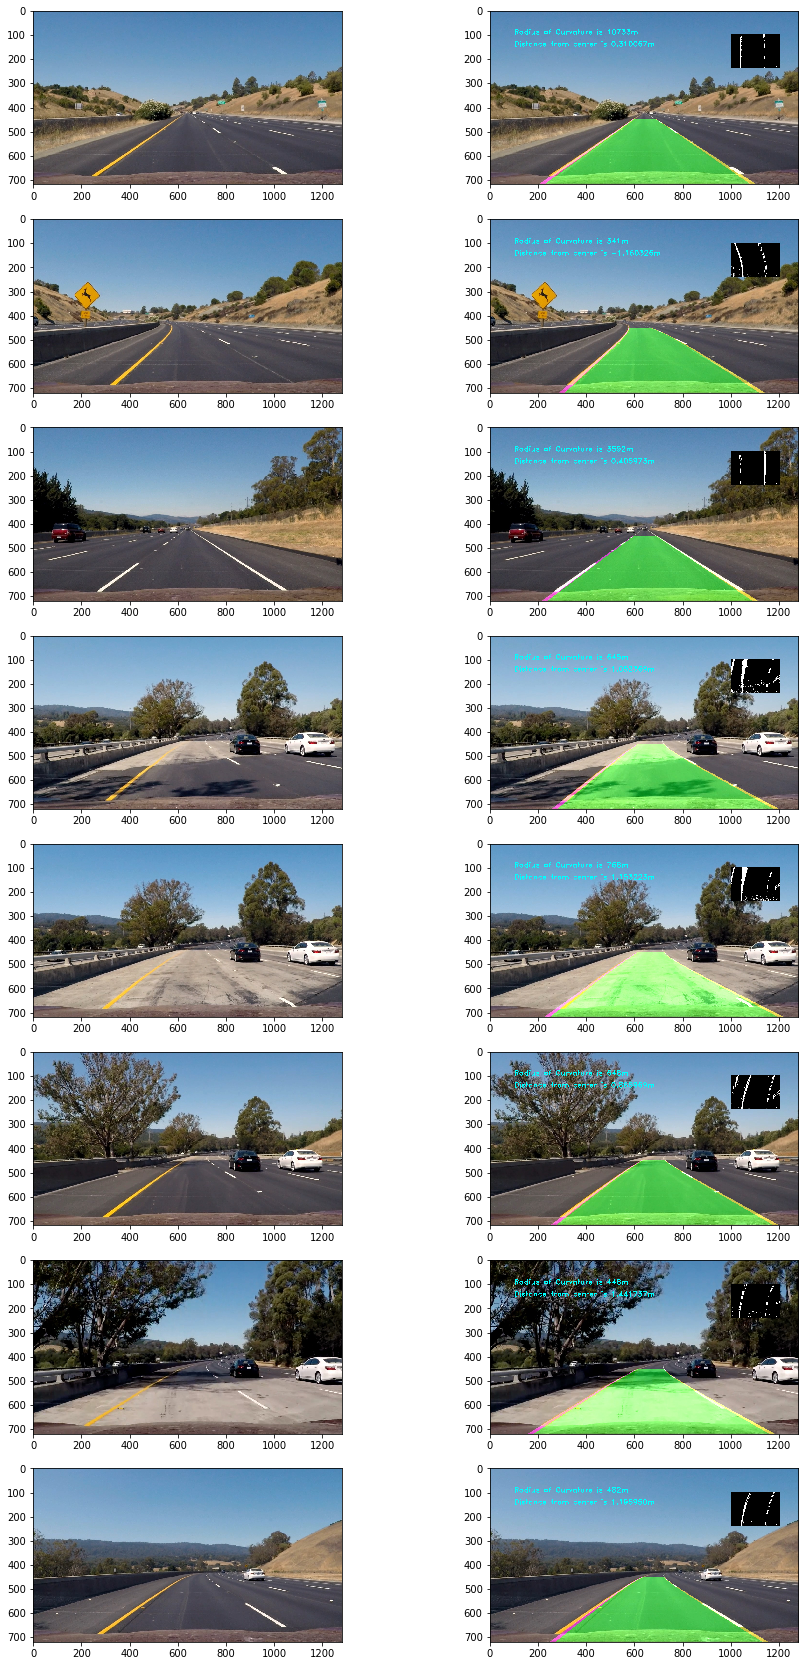

In [24]:
# Running Pipeline on all test images #
f, axes= plt.subplots(8,2,figsize=(15,30))

images = glob.glob('test_images/*.jpg') # Reading Images from test_images folder

for index, image in enumerate(images):
    originalImage = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
    #originalImage = mpimg.imread(image)
    finalImage = pipeline(originalImage)
    cv2.imwrite('output_images/'+str(index)+'.jpg', cv2.cvtColor(finalImage,cv2.COLOR_BGR2RGB))
    axes[index,0].imshow(originalImage)
    axes[index,1].imshow(finalImage)

# 15. Running Video Pipeline

In [25]:
import moviepy
from moviepy.editor import VideoFileClip
video_output1 = 'project_video_output.mp4'
video_input1 = VideoFileClip('project_video.mp4')
processed_video = video_input1.fl_image(pipeline)
%time processed_video.write_videofile(video_output1, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [05:21<00:00,  3.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 2min 55s, sys: 24.4 s, total: 3min 20s
Wall time: 5min 24s
